# Simple timecourse

In this example, a simple timecourse is defined for a simple ODE. Simulation and optimization is demonstrated.

The ODE is $\frac{dx}{dt} = p  q$, with $p$ an estimated parameter, and $q$ a timecourse parameter.

NB: in code, symbols are suffixed with `_` to avoid conflicts with packages.

In [1]:
from itertools import chain
from pathlib import Path

import amici
import numpy as np
import petab
import petab_timecourse

from simple_timecourse_helpers import get_analytical_x_, get_analytical_sx_


petab_path = Path('input') / 'simple_timecourse'
timecourse_id = 'timecourse1'
true_p_ = 1

In [2]:
petab_problem = petab_timecourse.Problem.from_yaml(petab_path / 'petab.yaml')

In [10]:
petab_problem.timecourse_df

,timecourse
timecourseId,
timecourse1,0:q_positive;10:q_zero;20:q_negative;30:q_zero...


The parameter timecourse is represented graphically here. At the indicated timepoints, the value of $q$ (`q_`) changes.
<img src="input/simple_timecourse/timecourse.png" width="400">

In [11]:
timecourse = petab_problem.get_timecourse(timecourse_id=timecourse_id)

In [12]:
[period.condition_id for period in timecourse.periods]

['q_positive', 'q_zero', 'q_negative', 'q_zero', 'q_positive']

In [13]:
from petab_timecourse.simulator import AmiciSimulator
simulator = AmiciSimulator(petab_problem=petab_problem, timecourse_id=timecourse_id)
simulator.amici_solver.setSensitivityOrder(1)

In [14]:
p_values = [0.5, 2.0, 1.0, 1.5, 2.0]

results = simulator.simulate(problem_parameters_periods=[{'p_': v} for v in p_values])

In [15]:
from petab_timecourse.amici import collect_x, collect_sx, collect_t


x_ = collect_x(results)
sx_ = collect_sx(results)
T = collect_t(results)

analytical_x_  = [np.round(get_analytical_x_(t, timecourse=timecourse, p_=true_p_), 5)  for t in T]
analytical_sx_ = [np.round(get_analytical_sx_(t, timecourse=timecourse), 5) for t in T]

# The state (x_) trajectory is correct.
#assert np.isclose(x_, analytical_x_).all()
# The state (x_) forward sensitivity w.r.t. the parameter (p_) is correct.
#assert np.isclose(sx_, analytical_sx_).all()

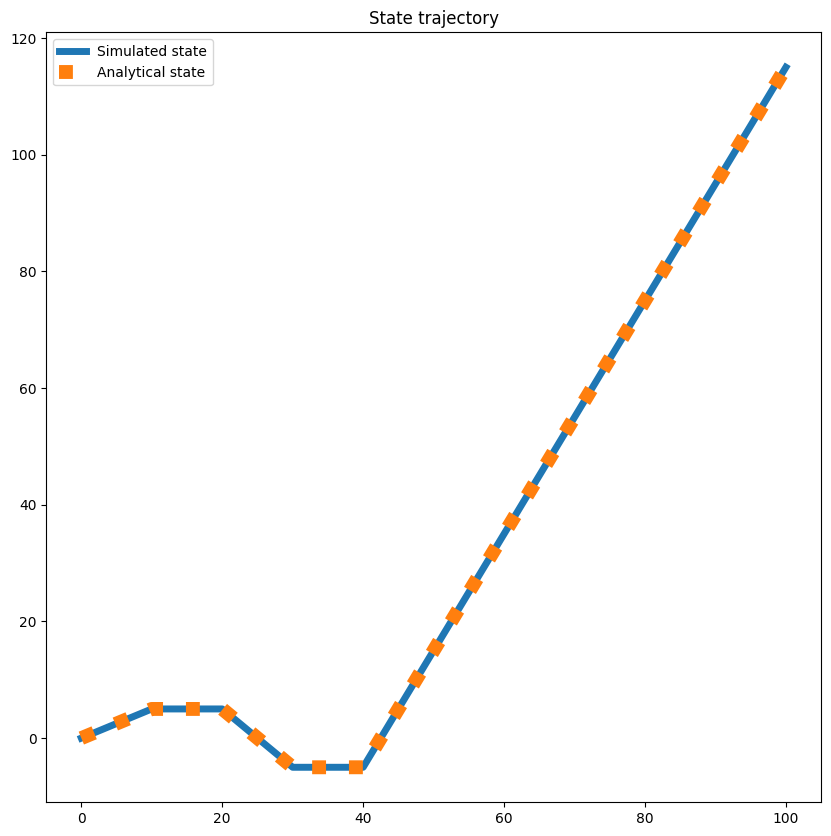

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(T, x_, lw=5, label='Simulated state')
ax.plot(T, analytical_x_, linestyle=':', lw=10, label='Analytical state')
ax.legend()
ax.set_title('State trajectory');

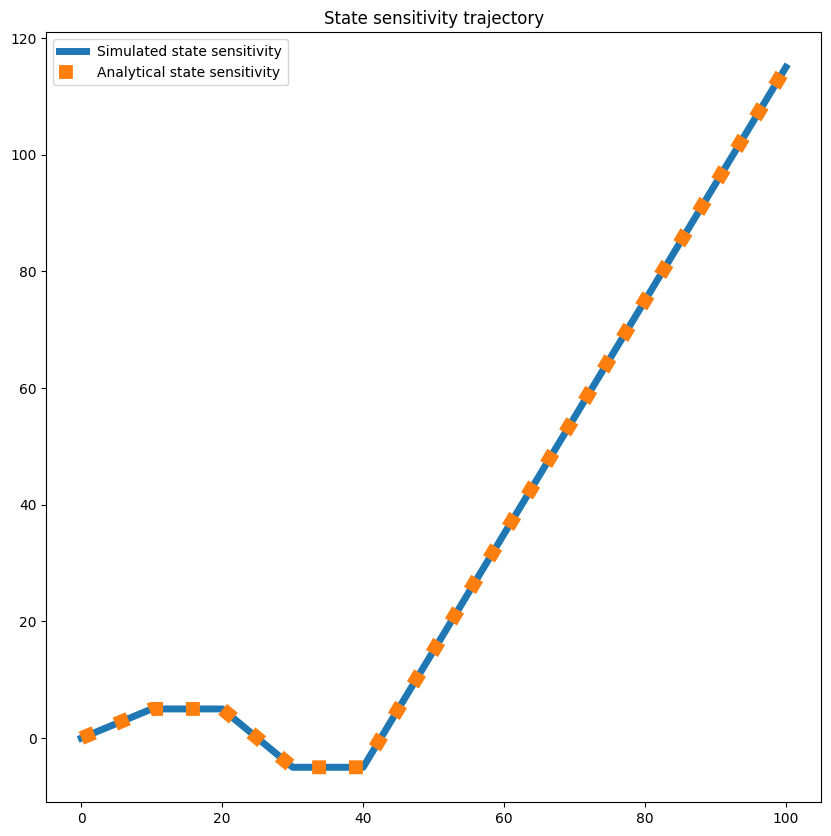

In [17]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(T, x_, lw=5, label='Simulated state sensitivity')
ax.plot(T, analytical_x_, linestyle=':', lw=10, label='Analytical state sensitivity')
ax.legend()
ax.set_title('State sensitivity trajectory');